In [1]:
# Importing the necessary ibraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings

# Preprocessing Libraries 
import imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

#Machine learning  model libraries 
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics libraries 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# To view the maximum number of columns and rows of the dataset 
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

# To remove the warning messages
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("data.csv")
data.head()


,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889

# Exploratory Data Analysis

### Preprocessing Steps

#### 1.Checking for null values 

In [4]:
# Taking the copy of the dataset 
df= data.copy()
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889

In [7]:
print("Number of Rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of Rows 6819
Number of columns 96


In [6]:
df.describe() # the data points are in range of values 

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.1150

In [8]:
df.info() #checking for categorical and numerical variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
# 2.Checking for the missing values in the dataset 
df.isna().sum() 

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [10]:
# Checking for the duplicated values 
df.duplicated().sum()

0

In [11]:
newdf=df.drop([" Liability-Assets Flag"," Net Income Flag"],axis=1) 
newdf.head()
# We are dropping this feature because 99% of the values are same in this column and has no influence over dependent variable


,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182

### since the values are scaled and mostly in range to check outliers Z-Score method is used.

In [12]:
# outlier using z score method 
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers  

In [13]:
for col in newdf.columns:
    sample_outliers = detect_outliers_zscore(newdf[col])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.066933164, 0.311314776, 0.0, 0.733193585, 0.301906108, 0.024277288, 0.30624482, 0.283332521, 0.082825525, 0.269000146, 0.249305319, 0.201969483, 0.270365134, 0.280310047, 0.207721932, 0.27772632, 0.310973529, 0.237459172, 0.233851704, 0.208160679, 0.231365476, 0.691512699, 0.711890021, 0.240579145, 0.247

#### Finding out which are the columns having the value above the range.

In [14]:
df_a = pd.DataFrame(columns=['Name','Values'])
for col in df.columns:
    val=(df[(df[col] > 1) | (df[col] < 0)].shape[0]/df.shape[0])*100
    d={'Name':col,'Values':val}
    df_a=df_a.append(d,ignore_index=True) 
    
df_a

,Name,Values
0,Bankrupt,0.000000
1,ROA(C) before interest and depreciation befor...,0.000000
2,ROA(A) before interest and % after tax,0.000000
3,ROA(B) before interest and depreciation after...,0.000000
4,Operating Gross Margin,0.000000
5,Realized Sales Gross Margin,0.000000
6,Operating Profit Rate,0.000000
7,Pre-tax net Interest Rate,0.000000
8,After-tax net Interest Rate,0.000000
9,Non-industry income and expenditure/revenue,0.000000


##### seperating the columns which are having less percentage of outliers from the dataset

In [15]:
df_out=df[[" Interest-bearing debt interest rate"," Revenue Per Share (Yuan ¥)"," Current Ratio"," Quick Ratio",
          " Total debt/Total net worth"," Accounts Receivable Turnover"," Average Collection Days",
          " Fixed Assets Turnover Frequency"," Allocation rate per person"," Quick Assets/Current Liability",
          " Cash/Current Liability"," Inventory/Current Liability"," Long-term Liability to Current Assets",
          " Current Asset Turnover Rate"," Fixed Assets to Assets"," Total assets to GNP price"," Revenue per person",
           " Net Value Growth Rate"]]

In [16]:
#Median imputation is used to handle the outliers.
for col in df_out.columns:
    df[col]=np.where((df[col] < 0)|(df[col]>1),df[col].median(), df[col])


In [17]:
df_a = pd.DataFrame(columns=['Name','Values'])
for col in df.columns:
    val=(df[(df[col] > 1) | (df[col] < 0)].shape[0]/df.shape[0])*100
    d={'Name':col,'Values':val}
    df_a=df_a.append(d,ignore_index=True) 

In [18]:
df_a

,Name,Values
0,Bankrupt,0.000000
1,ROA(C) before interest and depreciation befor...,0.000000
2,ROA(A) before interest and % after tax,0.000000
3,ROA(B) before interest and depreciation after...,0.000000
4,Operating Gross Margin,0.000000
5,Realized Sales Gross Margin,0.000000
6,Operating Profit Rate,0.000000
7,Pre-tax net Interest Rate,0.000000
8,After-tax net Interest Rate,0.000000
9,Non-industry income and expenditure/revenue,0.000000


### Data Visualization 

,index,Bankrupt
0,0,6599
1,1,220


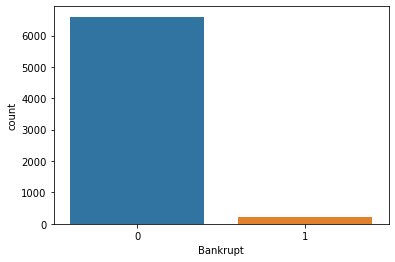

In [26]:
#Dependent variable - This graph shows that the dependent variable is highly imbalanced
sns.countplot(df['Bankrupt'])
Dep = df['Bankrupt'].value_counts()
Dep = pd.DataFrame(Dep)
Dep = Dep.reset_index()
Dep= Dep.rename(columns={'Count':'Bankrupt'})
Dep

#### This Graph shows that how much the dependent variable is imbalanced.

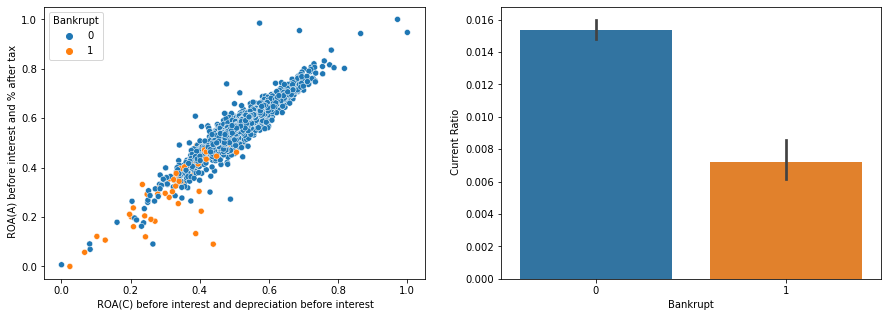

In [165]:
fig, g = plt.subplots(1, 2, figsize=(15,5))
g1 = sns.scatterplot(x=' ROA(C) before interest and depreciation before interest',y=' ROA(A) before interest and % after tax',
                     data=df,hue= 'Bankrupt',ax=g[0])
g2= sns.barplot(y=' Current Ratio',x='Bankrupt',data=df,ax=g[1])

## Inference :
     ##   G1. Return on total asset (ROA)(C) &(A) provides us the information that lower the returns mostlikely the company 
     ##   might go bankrupt.
     ##   G2. current ratio is companys short term liquidity to pay off all debts so it majorly influences whether company 
     ##   will go bankrupt.

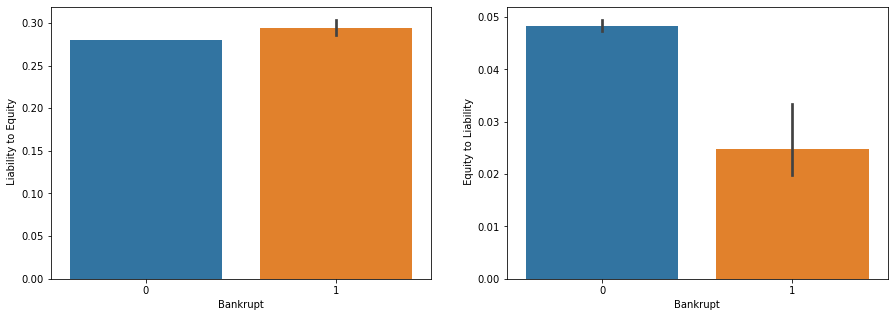

In [166]:
fig, g = plt.subplots(1, 2, figsize=(15,5))

g1= sns.barplot(y=' Liability to Equity',x='Bankrupt',data=df,ax=g[0])
g2= sns.barplot(y=' Equity to Liability',x='Bankrupt',data=df,ax=g[1])

# Infernce:
    ##   G1.Liability to equity is company's total liabilities to its stakeholder's equity which has high influene 
           of the company to go bankrupt   
    ##   G2.Equity to Liability is that the companys total debt to total equity which has influence on whether company                mightgo bankrupt 
 

<AxesSubplot:xlabel='Bankrupt', ylabel=' Degree of Financial Leverage (DFL)'>

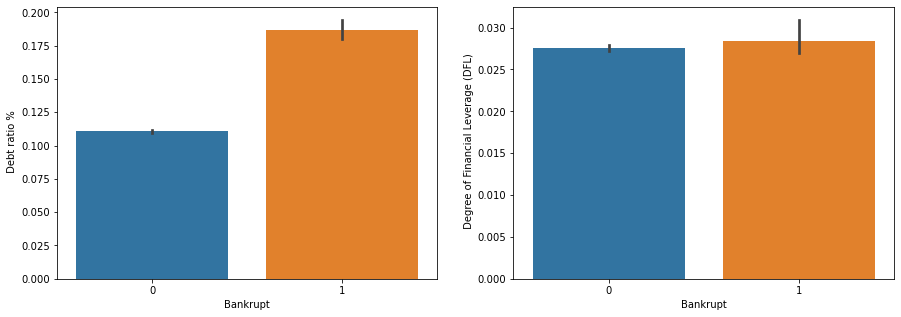

In [167]:
fig, g = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(y=' Debt ratio %',data=df,x='Bankrupt',ax=g[0])
sns.barplot(y=' Degree of Financial Leverage (DFL)',data=df,x='Bankrupt',ax=g[1])



# Infernce:
    ## G1. If the debt ratio of the compay is more higher more likely the company will go bankrupt 
    ## G2. If DFL is high then more posibility that company may go bankrupt 

<AxesSubplot:xlabel='Bankrupt', ylabel=' Quick Ratio'>

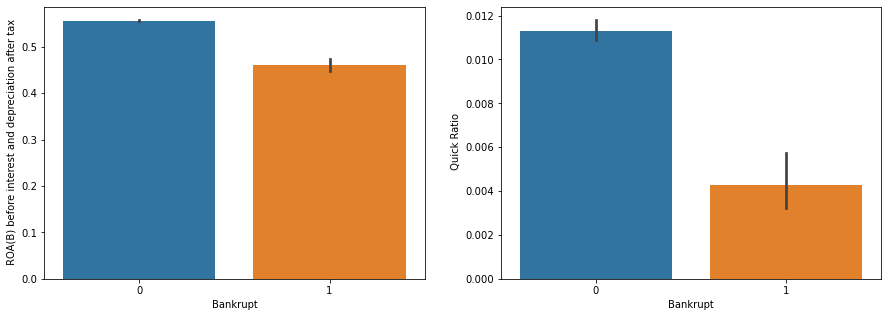

In [25]:
fig, g = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(y=' ROA(B) before interest and depreciation after tax',data=df,x='Bankrupt',ax=g[0])
sns.barplot(y=' Quick Ratio',data=df,x='Bankrupt',ax=g[1])


# Infernce:
    ## G1. If the Return on Assets(ROA) is low then the company might go bankrupt means it has to sell its assets.
    ## G2. Quick ratio is that the capabilities of the company to pay its current liabilities without selling the company 
    ## so , if the quick ratio is lower the company will go bankrupt

<AxesSubplot:xlabel='Bankrupt', ylabel=' Pre-tax net Interest Rate'>

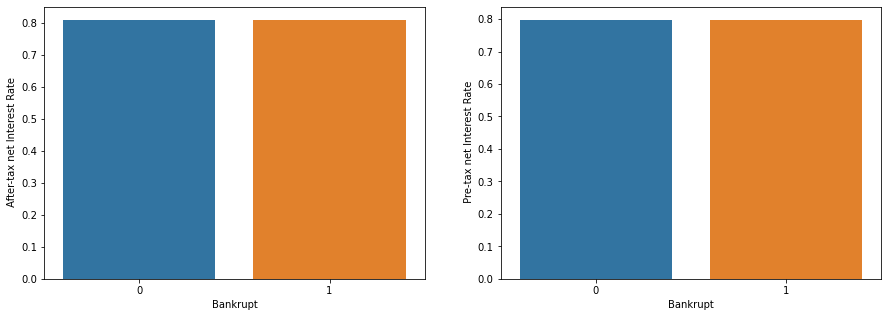

In [169]:
fig, g = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(y=' After-tax net Interest Rate',data=df,x='Bankrupt',ax=g[0])
sns.barplot(y=' Pre-tax net Interest Rate',data=df,x='Bankrupt',ax=g[1])


# Infernce:
    ## G1. Return on investment that include tax has major importance on the company whether it might go bankrupt or not
    ## G2. Return on investment that does not include tax has equal importance on the company whether it might go bankrupt
            or not

<AxesSubplot:xlabel='Bankrupt', ylabel=' Current Liability to Current Assets'>

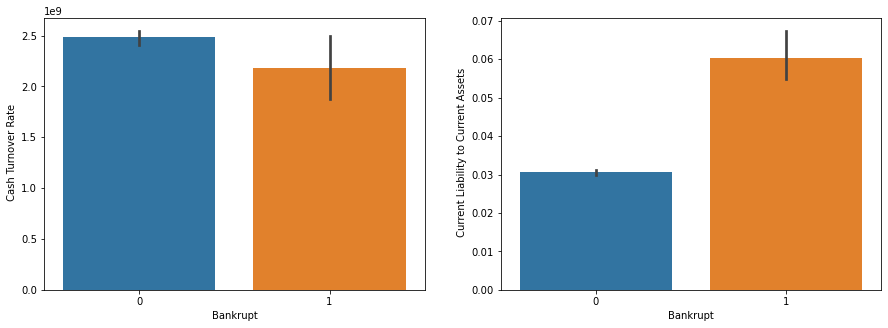

In [170]:
fig, g = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(y=' Cash Turnover Rate',x='Bankrupt', data = df,ax=g[0])
sns.barplot(y=' Current Liability to Current Assets',x='Bankrupt', data = df,ax=g[1])

# Infernce:
    ## G1. The cash turnover rate highly influences the bankruptcy prediction of the company.
    ## G2. Current liability to current assest aslo influences majorly for bankruptcy, so we need to reduce it.

<AxesSubplot:>

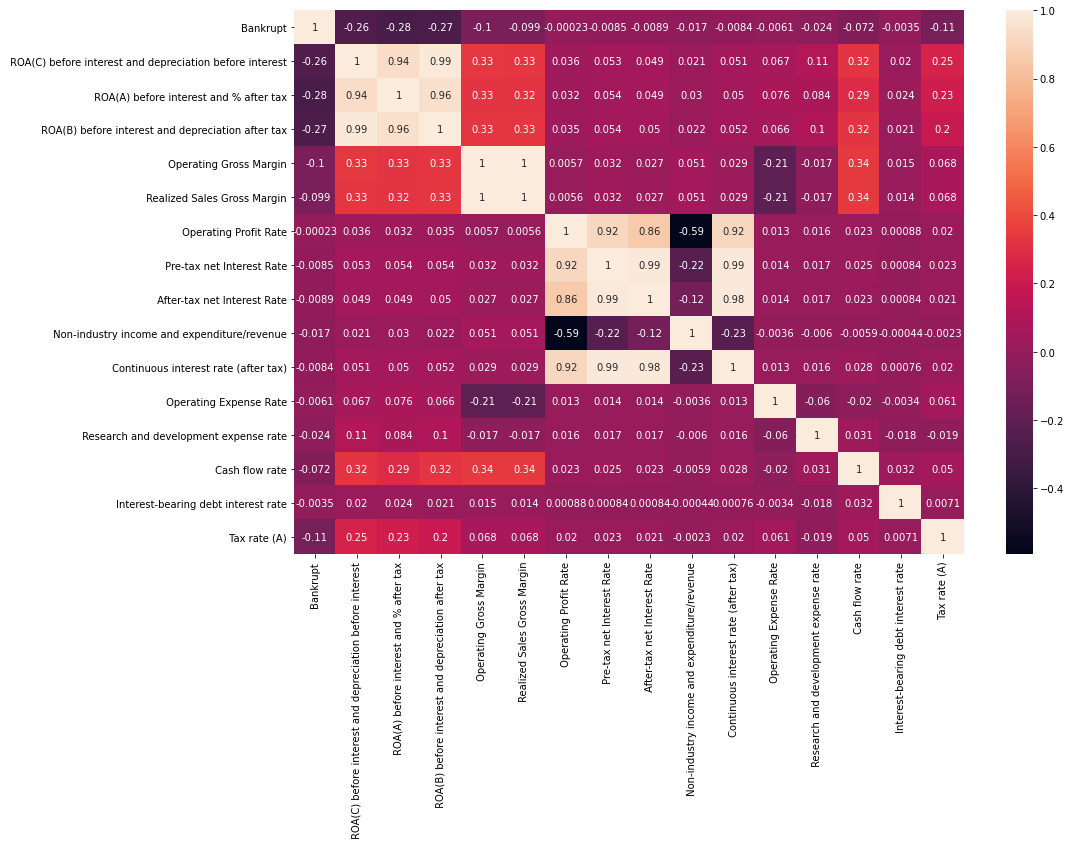

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:16].corr(),annot=True)

### Inference:
    ####The correlation matrix shows that the features are highly correlated,so we can drop one of the features,such as ROA(B) before interest and depreciation after tax.

<AxesSubplot:>

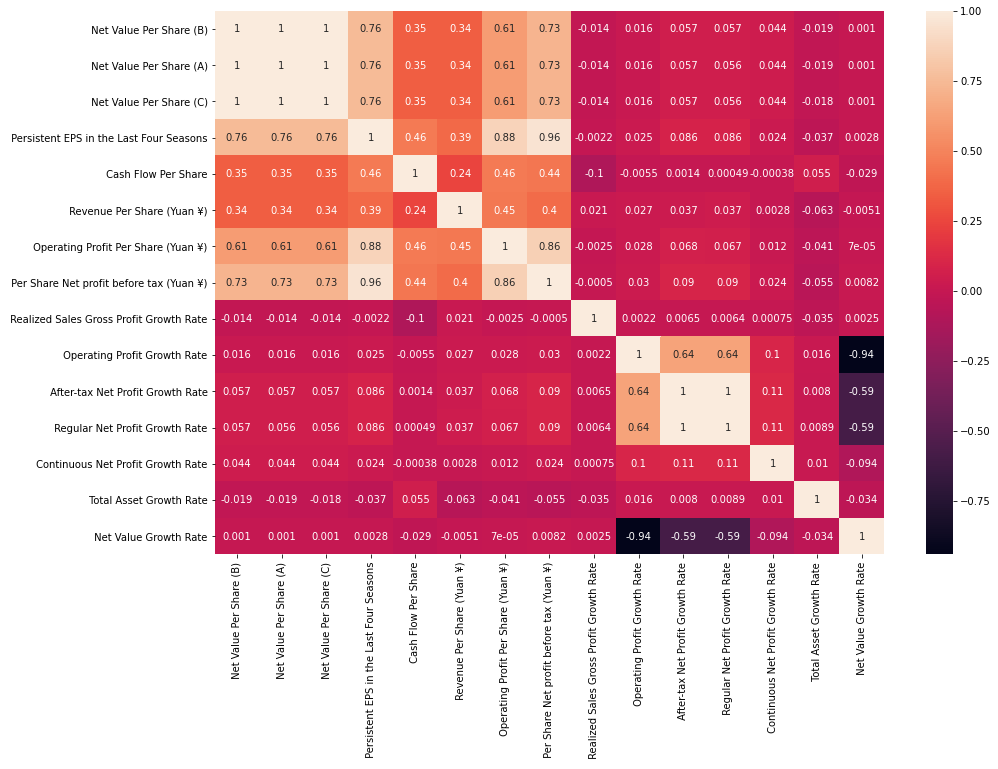

In [172]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,16:31].corr(),annot=True)
# The correlation matrix shows that the features are highly correlated,so we can drop the features which are highly correlated.

<AxesSubplot:>

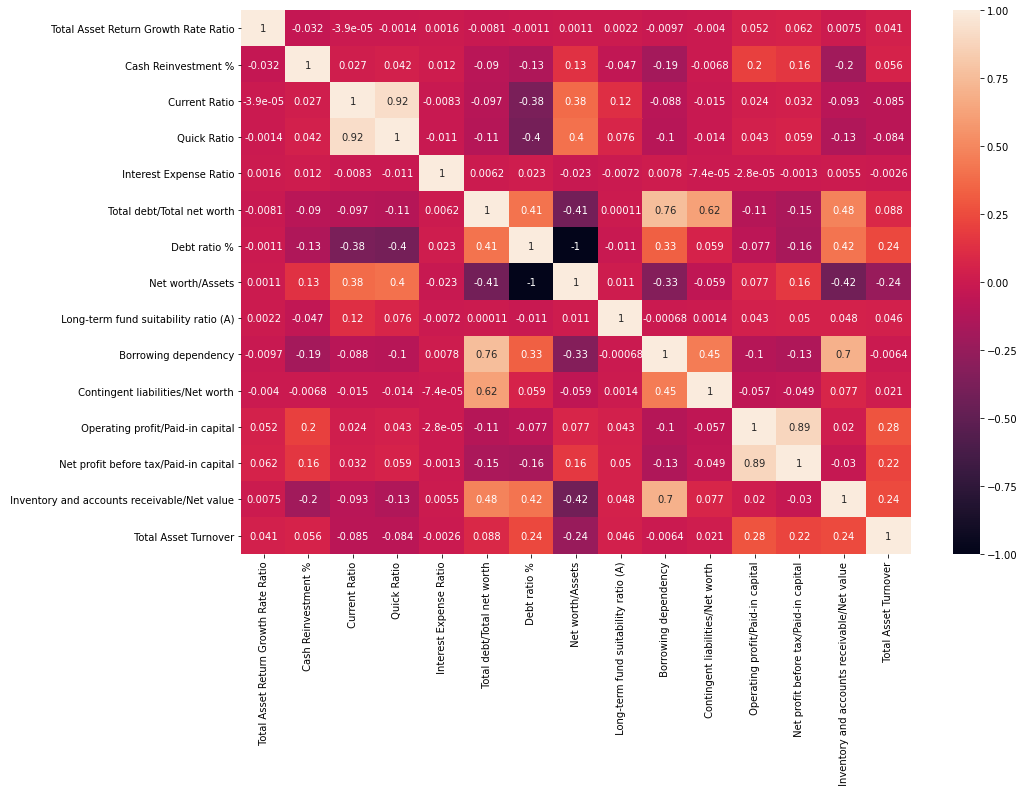

In [173]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,31:46].corr(),annot=True)

#### Splitting the data set into train and test dataset 

In [175]:
y=df["Bankrupt"]
x=df.drop(["Bankrupt"],axis=1)


In [177]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3)

In [178]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4773, 95)
(2046, 95)
(4773,)
(2046,)


In [179]:
Prevalance_rate_ytrain=ytrain.value_counts() #.mul(100).round(1)
Prevalance_rate_ytrain

0    4624
1     149
Name: Bankrupt, dtype: int64

In [180]:
Prevalance_rate_ytest=ytest.value_counts()#.mul(100).round(1)
Prevalance_rate_ytest


0    1975
1      71
Name: Bankrupt, dtype: int64

In [182]:
model=LogisticRegression(max_iter=5000)

In [183]:
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=5000)

In [184]:
ypred=model.predict(xtrain)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
ypred1=model.predict(xtest)
ypred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [187]:
accuracy_score(ytrain,ypred)

0.9687827362245967

In [188]:
accuracy_score(ytest,ypred1)

0.9652981427174976

In [189]:
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4624
           1       0.00      0.00      0.00       149

    accuracy                           0.97      4773
   macro avg       0.48      0.50      0.49      4773
weighted avg       0.94      0.97      0.95      4773



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
confusion_matrix(ytrain,ypred)

array([[4624,    0],
       [ 149,    0]], dtype=int64)

In [191]:
confusion_matrix(ytest,ypred1)

array([[1975,    0],
       [  71,    0]], dtype=int64)

In [232]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4773, 95)
(2046, 95)
(4773,)
(2046,)


In [47]:
#with open('model_pickle','wb') as f:
 #   pickle.dump(model,f)


In [48]:
#with open('model_pickle','rb')as f:
 #   lr = pickle.load(f)

In [49]:
    #lr.predict(xtrain)

In [50]:
# accuracy_score(ytrain ,lr.predict(xtrain))

### Performing SMOTE operation for changing the dataset from imbalanced to balanced.

In [195]:
sm= SMOTE()

In [196]:
 x_smote,y_smote = sm.fit_resample(xtrain,ytrain)

In [197]:
print(x_smote.shape)
print(y_smote.shape)


(9248, 95)
(9248,)


In [198]:
x1train= x_smote
y1train= y_smote

In [199]:
model1=LogisticRegression(max_iter=1000)

In [200]:
model1.fit(x1train,y1train)

LogisticRegression(max_iter=1000)

In [201]:
ypred_train=model1.predict(x1train)
ypred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
ypred_test=model1.predict(xtest)
ypred_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [203]:
accuracy_score(y1train,ypred_train)

0.5449826989619377

In [204]:
accuracy_score(ytest,ypred_test)

0.7086999022482894

In [205]:
confusion_matrix(y1train,ypred_train)

array([[3294, 1330],
       [2878, 1746]], dtype=int64)

In [206]:
confusion_matrix(ytest,ypred_test)

array([[1423,  552],
       [  44,   27]], dtype=int64)

In [65]:
#with open('smote_LOR_model_pickle','wb') as f:
    #pickle.dump(model,f)


## Building a random forest model 

In [208]:
rf = RandomForestClassifier()

In [209]:
rf.fit(x1train,y1train)

RandomForestClassifier()

In [210]:
ypred_rf_train=rf.predict(x1train)
ypred_rf_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [211]:
ypred_rf_test=rf.predict(xtest)
ypred_rf_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [212]:
accuracy_score(y1train,ypred_rf_train)

1.0

In [213]:
accuracy_score(ytest,ypred_rf_test)

0.9530791788856305

In [214]:
confusion_matrix(y1train,ypred_rf_train)

array([[4624,    0],
       [   0, 4624]], dtype=int64)

In [215]:
confusion_matrix(ytest,ypred_rf_test)

array([[1910,   65],
       [  31,   40]], dtype=int64)

In [216]:
rf.feature_importances_

array([0.01765906, 0.0200092 , 0.02950111, 0.00298553, 0.00346523,
       0.00567741, 0.02618972, 0.03568593, 0.02260416, 0.05173531,
       0.00462298, 0.00336443, 0.00317976, 0.01275393, 0.0030909 ,
       0.00617405, 0.00670192, 0.00810019, 0.05064845, 0.00314332,
       0.00356141, 0.00272856, 0.04163763, 0.00231629, 0.00423542,
       0.00358263, 0.00344577, 0.00331267, 0.00682399, 0.01084188,
       0.00287627, 0.00232887, 0.00406826, 0.01383763, 0.01087791,
       0.04738745, 0.03196984, 0.01813005, 0.00237009, 0.01528532,
       0.00537296, 0.00339439, 0.0239441 , 0.00232399, 0.00440663,
       0.00370336, 0.00574301, 0.00557196, 0.00375212, 0.00318312,
       0.00696407, 0.00537218, 0.01400963, 0.00263348, 0.00293771,
       0.00341958, 0.00557661, 0.00492836, 0.00630178, 0.00934262,
       0.0032587 , 0.00682774, 0.00412889, 0.00388191, 0.00223666,
       0.0105442 , 0.00760813, 0.0543316 , 0.03886711, 0.00506659,
       0.00539529, 0.0058793 , 0.00329563, 0.00986315, 0.00428

In [217]:
req_feature = pd.DataFrame(zip(x1train.columns, abs(rf.feature_importances_)),
                           columns=["feature", "weight"],).sort_values("weight",ascending=False,)

In [218]:
req_feature

,feature,weight
67,Retained Earnings to Total Assets,0.054332
9,Continuous interest rate (after tax),0.051735
18,Persistent EPS in the Last Four Seasons,0.050648
35,Total debt/Total net worth,0.047387
85,Net Income to Total Assets,0.045381
22,Per Share Net profit before tax (Yuan ¥),0.041638
68,Total income/Total expense,0.038867
7,After-tax net Interest Rate,0.035686
36,Debt ratio %,0.031970
2,ROA(B) before interest and depreciation after...,0.029501


### Gridsearchcv - For finding the best hyperparameters.


In [78]:
from sklearn.model_selection import GridSearchCV


In [79]:
gsv=GridSearchCV(estimator=rf,param_grid={'n_estimators':[50,100,150,200,250,300,350,400,450,500],
                                                'max_depth':[3,4,5,6,7,8,9,10]},cv=5,scoring='accuracy',verbose=1)

In [80]:
gsv.fit(x1train,y1train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='accuracy', verbose=1)

In [81]:
print(gsv.best_params_)

{'max_depth': 10, 'n_estimators': 100}


### RFE- Recursive Feature Elimination 

In [85]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100,max_depth=10,n_jobs=4,random_state=62),n_features_to_select=30)

In [86]:
rfe.fit(x1train,y1train)

RFE(estimator=RandomForestClassifier(max_depth=10, n_jobs=4, random_state=62),
    n_features_to_select=30)

In [105]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)

Num Features: 30
Selected Features: [ True False False False False False  True  True  True  True False False
 False  True False False False False  True False False False  True False
 False False False False False  True False False False  True  True  True
  True  True False  True False False  True False False False False False
 False False  True False  True False False False False False False False
 False  True False False False  True  True  True  True False False False
 False  True False False False  True False False False False False False
 False  True False False False  True  True  True False False  True]


In [106]:
for feature in rfe.support_.nonzero():
    print(x1train.columns[feature])

Index([' ROA(C) before interest and depreciation before interest',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Interest-bearing debt interest rate',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Revenue per person', ' Allocation rate per person',
       ' Inventory/Working Capital', ' Current Liabilities/Equity',
       ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Cash Turnover Rate', ' Current Liability to Equity',
       ' Net Income to Total Assets', ' Net Income to Stockholders Eq

In [219]:
df.head(5)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,0.000117,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,0.000199,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,0.000593,0.025484,0.006889,0.391590,0.0123

In [220]:
db=df[[' ROA(C) before interest and depreciation before interest',' Pre-tax net Interest Rate',' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',' Continuous interest rate (after tax)',' Interest-bearing debt interest rate',
       ' Persistent EPS in the Last Four Seasons',' Per Share Net profit before tax (Yuan ¥)',' Net Value Growth Rate',
       ' Quick Ratio',' Interest Expense Ratio',' Total debt/Total net worth', ' Debt ratio %',' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',' Revenue per person',' Allocation rate per person',
       ' Inventory/Working Capital',' Current Liabilities/Equity',' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets',' Total income/Total expense',' Cash Turnover Rate',' Current Liability to Equity',
       ' Net Income to Total Assets',' Net Income to Stockholders Equity',' Liability to Equity',' Degree of Financial Leverage (DFL)',
       ' Equity to Liability']]

In [221]:
db.head()

,ROA(C) before interest and depreciation before interest,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Interest-bearing debt interest rate,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Revenue per person,Allocation rate per person,Inventory/Working Capital,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Cash Turnover Rate,Current Liability to Equity,Net Income to Total Assets,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Equity to Liability
0,0.370594,0.796887,0.808809,0.302646,0.780985,0.000725,0.169141,0.138736,0.000327,0.001208,0.629951,0.021266,0.207576,0.792424,0.390284,0.137757,0.034164,0.037135,0.276920,0.339077,0.025592,0.903225,0.002022,4.580000e+08,0.339077,0.716845,0.827890,0.290202,0.026601,0.016469
1,0.464291,0.797380,0.809301,0.303556,0.781506,0.000647,0.208944,0.169918,0.000443,0.004039,0.635172,0.012502,0.171176,0.828824,0.376760,0.168962,0.006889,0.012335,0.289642,0.329740,0.023947,0.931065,0.002226,2.490000e+09,0.329740,0.795297,0.839969,0.283846,0.264577,0.020794
2,0.426071,0.796403,0.808388,0.302035,0.780284,0.000790,0.180581,0.142803,0.000396,0.005348,0.629631,0.021248,0.207516,0.792484,0.379093,0.148036,0.028997,0.141016,0.277456,0.334777,0.003715,0.909903,0.002060,7.610000e+08,0.334777,0.774670,0.836774,0.290189,0.026555,0.016474
3,0.399844,0.796967,0.808966,0.303350,0.781241,0.000449,0.193722,0.148603,0.000382,0.002896,0.630228,0.009572,0.151465,0.848535,0.379743,0.147561,0.015463,0.021320,0.276580,0.331509,0.022165,0.906902,0.001831,2.030000e+09,0.331509,0.739555,0.834697,0.281721,0.026697,0.023982
4,0.465022,0.797366,0.809304,0.303475,0.781550,0.000686,0.212537,0.168412,0.000439,0.003727,0.636055,0.005150,0.106509,0.893491,0.375025,0.167461,0.058111,0.023988,0.287913,0.330726,0.000000,0.913850,0.002224,8.240000e+08,0.330726,0.795016,0.839973,0.278514,0.024752,0.035490


In [222]:
df['Bankrupt'].head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt, dtype: int64

In [223]:
x1=db
y1=df['Bankrupt']

In [224]:
print(x1.shape)
print(y1.shape)

(6819, 30)
(6819,)


In [241]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=100)


In [242]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(4773, 30)
(4773,)
(2046, 30)
(2046,)


In [243]:
smote= SMOTE()

In [244]:
 x_resampled,y_resampled = smote.fit_resample(x1_train,y1_train)
 print(x_resampled.shape)
 print(y_resampled.shape)

In [245]:
x_1_train = x_resampled
y_1_train = y_resampled

In [255]:
RF= RandomForestClassifier(n_estimators=100,max_depth=10,n_jobs=4,random_state=62)

In [256]:
RF_model = RF.fit(x_1_train,y_1_train)

In [257]:
ypred_RF_train = RF.predict(x_1_train)
ypred_RF_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [258]:
ypred_RF_test = RF.predict(x1_test)
ypred_RF_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [259]:
accuracy_score(y_1_train,ypred_RF_train)

0.9853131749460043

In [260]:
accuracy_score(y1_test,ypred_RF_test)

0.9310850439882697

In [263]:
confusion_matrix(y_1_train,ypred_RF_train)

array([[4494,  136],
       [   0, 4630]], dtype=int64)

In [264]:
confusion_matrix(y1_test,ypred_RF_test)

array([[1853,  116],
       [  25,   52]], dtype=int64)

In [266]:
print(classification_report(y_1_train,ypred_RF_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4630
           1       0.97      1.00      0.99      4630

    accuracy                           0.99      9260
   macro avg       0.99      0.99      0.99      9260
weighted avg       0.99      0.99      0.99      9260



In [267]:
# Model Saving

import pickle
filename = 'model.pkl'
destiny = os.getcwd()
pickle.dump(RF, open(destiny + f'\\{filename}', 'wb'))